# Ejercicio 1. Epidemiología

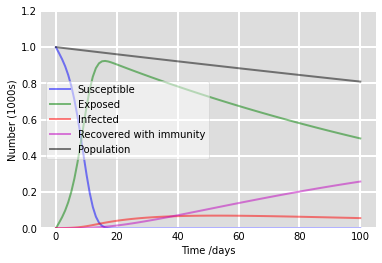

In [17]:
#import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#Definiendo los parámetros iniciales:

## Tasa de infeccion, recuperacion, mortalidad, natalidad, incubacion
beta, gamma, mu, nu, alfa_1 = 0.03, 5./100, 0.1/100, 0.1/100, 0.005

## Poblacion inicial N.
N = 1000

## Número inicial de personas expuestas, infectadas y recuperadas , E0, I0 y R0.
E0, I0, R0 = 0, 1, 0

## Todos los demás, S0, pertenecen a la poblacion suceptible.
S0 = N - E0 - I0 - R0

## Vector con las condiciones iniciales Y0
Y0 = S0, E0, I0, R0

## Tiempo, puntos de datos (in days)
Tamano_grid = 100
Step = 100
t = np.linspace(0, Tamano_grid, Step)


# Definiendo la funcion Y(t):

def derivadas_SEIR(Y, t, beta, gamma, mu, nu, alfa_1):
    #Esta función construye un vector con las derivadas dE_dt, dS/dt, dI/dt y dR/dt cada día.
    
    S, E, I, R = Y

    #Ecuaciones diferenciales del Modelo SEIR
    dS_dt = - beta * S * I - nu * N - mu * S
    
    dE_dt = beta * S * I - alfa_1 * E - mu * E
    
    dI_dt = alfa_1 * E - gamma * I - mu * I
    
    dR_dt = gamma * I - mu * R
    
    return dS_dt, dE_dt, dI_dt, dR_dt


# Vector con las condiciones iniciales Y0
#Y0 = S0, E0, I0, R0

# Integrando las ecuaciones SIER en funcion del tiempo.
integral = odeint(derivadas_SEIR, Y0, t, args=(beta, gamma, mu, nu, alfa_1))
S, E, I, R = integral.T


# Plot de los 5 grupos en curvas separadas
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'g', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'm', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (S+E+I+R)/1000, 'k', alpha=0.5, lw=2, label='Population')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()

Realizado por María Linares